In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("data_clean.csv")
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [3]:
# Change Column names (Rename the columns)
df.rename({'Solar.R': 'Solar'}, axis=1, inplace = True)
df

,Unnamed: 0,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [4]:
# Display data1 missing values count in each column using isnull().sum()
df.isnull().sum()

Unnamed: 0     0
Ozone         38
Solar          7
Wind           0
Temp C         0
Month          0
Day            0
Year           0
Temp           0
Weather        3
dtype: int64

<Axes: >

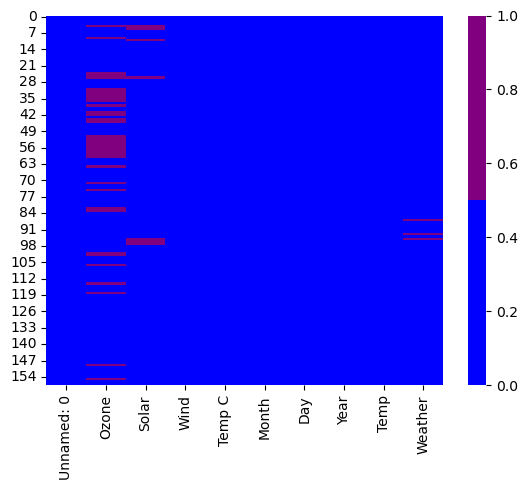

In [5]:
#visualize df missing values using graph
cols = df.columns
colours = ['blue', 'purple']
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colours),cbar = True)

In [6]:
#Find the mean and median values of each numeric column
#Imputation of missing value with median
median_ozone = df["Ozone"].median()
mean_ozone = df["Ozone"].mean()
print("Median of Ozone: ",median_ozone)
print("Mean of Ozone: ",mean_ozone)

Median of Ozone:  30.5
Mean of Ozone:  41.583333333333336


In [7]:
# Replace the Ozone missing values with median value
df['Ozone'] = df['Ozone'].fillna(median_ozone)
df.isnull().sum()

Unnamed: 0    0
Ozone         0
Solar         7
Wind          0
Temp C        0
Month         0
Day           0
Year          0
Temp          0
Weather       3
dtype: int64

In [15]:
# Find the mode values of categorical column (weather)
print(df["Weather"],value_counts())
mode_weather = df["Weather"],mode()[0]
print(mode_weather)

NameError: name 'value_counts' is not defined

Text(0.5, 1.0, 'Violin Plot')

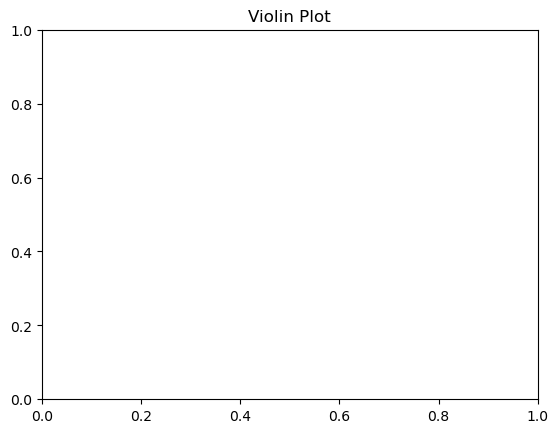

In [9]:
# Create a figure for violin plot
sns.violinplot(df=df["Ozone"], color='lightgreen')
plt.title("Violin Plot")

AttributeError: 'Line2D' object has no attribute 'get_xdf'

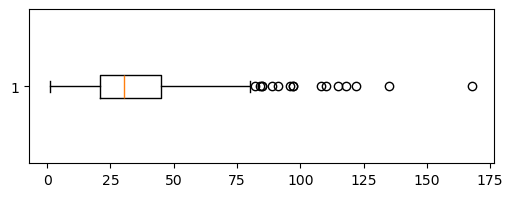

In [11]:
# Extract outliers from boxplot for ozone column
plt.figure(figsize=(6,2))
boxplot_df = plt.boxplot(df["Ozone"], vert=False)
[item.get_xdf() for item in boxplot_df['fliers']]

In [13]:
df["Ozone"].describe()

count    158.000000
mean      38.917722
std       28.794730
min        1.000000
25%       21.000000
50%       30.500000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [17]:
mu = df["Ozone"].describe()[1]
sigma = df["Ozone"].describe()[2]
for x in df["Ozone"]:
    if ((x < (mu - 3*sigma)) or (x > (mu + 3*sigma))):
        print(x)

135.0
168.0


C:\Users\venka\AppData\Local\Temp\ipykernel_2064\761962557.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = df["Ozone"].describe()[1]
C:\Users\venka\AppData\Local\Temp\ipykernel_2064\761962557.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = df["Ozone"].describe()[2]


AttributeError: Text.set() got an unexpected keyword argument 'frontsize'

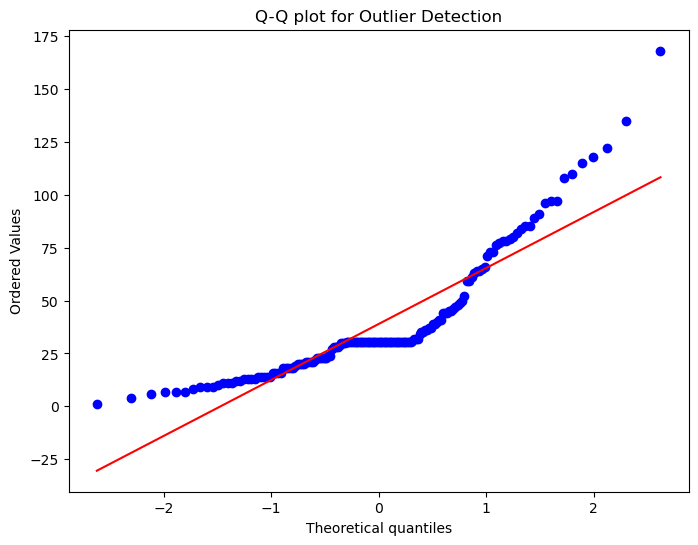

In [19]:
import scipy.stats as stats
# Create Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(df["Ozone"], dist="norm",plot=plt)
plt.title("Q-Q plot for Outlier Detection", frontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)